# PSLG overlaying

## Терминология

тут ссылка на конспект Витали
* ППЛГ $-$ плоский прямолинейный граф ($PSLG $). 
* РСДС $-$ ребренный список с двойными связями ($doubly$$-$$connected$ $edge$ $lists$).
* ППЛГ удобно хранить с помощью РСДС.

* ППЛГ $O(S_1,S_2)$ $-$ наложение двух ППЛГ $S_1$ и $S_2$. Грань $f$ принадлежит $O(S_1,S_2)$ тогда и только тогда, когда существуют грани $f_1$ из $S_1$ и $f_2$ из $S_2$, что $f$ $-$ максимальное связанное подмножество наложения $f_1$ и $f_2$.

<img src="images/построение_пплг.png" />
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
</sub>
</div>

## Задача
На вход подаются многоугольники, необходимо найти их наложение. Сведем к задаче о наложении двух РСДС: по двум РСДС $S_1$ и $S_2$ необходимо построить РСДС для $O(S_1,S_2)$.

## Алгоритм

Алгоритм работает в три этапа:
   *  Нахождение информации о ребрах $O(S_1,S_2)$
   *  Построение граней $O(S_1,S_2)$
   *  Связать грани из $O(S_1,S_2)$ с гранями из $S_1$ и $S_2$

### Нахождение информации о ребрах $O(S_1,S_2)$

#### Заметающая прямая 
тут ссылка на конспект Мехрубона

Алгоритм "заметающей прямой" решает задачу о пересечении множества отрезков и работает за $O((n+I)\cdot log(n))$, где $I$ $-$ количество пересечений и использует $O(n)$ памяти. Главная идея этого алгоритма в том, что есть вертикальная прямая, она движется вправо и следит за событиями: 
    * прямая пересекла правый конец отрезка (конец отрезка)
    * прямая пересекла левый конец отрезка (начало отрезка)
    * прямая пересекла точку пересечения пары отрезков

<img src="images/заметающая_прямая.png" width="250"/>
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
</sub>
</div>

Нахождение пересечений ребер $S_1$ и $S_2$ базируется на алгоритме "заметающей прямой" с небольшими изменениями:

#### Необходимые структуры данных

* очередь событий $Q$
* статус $T$, в котором будем хранить полуребра, ориентированные слева направо

#### Обработка ребер

Будем придерживаться инварианта, что в любой момент времени, события на заметающей прямой, которые мы уже обработали, пересчитаны корректно для $O(S_1,S_2)$

* Скопируем РСДС $S_1$ и $S_2$ в новый РСДС. Мы получили РСДС без правильных вершинно-ребренных связей. Наша задача получить из текущего РСДС корректный РСДС.
* На новом РСДС запускаем алгоритм заметающей прямой на множестве ребер, являющимся объединением ребер из $S_1$ и $S_2$. 
* Если на заметающей прямой мы обрабатываем событие, представляющее собой вершину, в которую входят ребра только одного РСДС, то эту вершину можно переиспользовать, и мы можем перейти к следующему событию ничего не меняя.
* Иначе надо изменить РСДС. Пусть у нас есть два ребра $e_1$, $e_2$ и вершина $v$ $-$ событие на заметающей прямой. 
     * Возможны следующие случаи:
          1. Вершина ребра $e_2$ проходит через ребро $e_1$, разбивая его на два новых ребра
          
          2. Ребро $e_1$ пересекает ребро $e_2$ и образуется 4 новых ребра
          
          3. Ребра $e_1$ и $e_2$ пересекаются в вершине
          
          4. Вершина ребра $e_1$ проходит через ребро $e_2$, разбивая его на 2 новых ребра
          
          5. Ребра $e_1$ и $e_2$ имеют общий отрезок и образуют новое ребро
          



<img src="images/варианты пересечения ребер.png" />

<div style="padding-left:230px">
<sub>
$Викиконспекты, Пересечение\_многоугольников$
</sub>
</div>


Рассмотрим алгоритм разбора для случая $4$, остальные случаи обрабатываются аналогично.
* Получим новые полуребра

    * Пусть ребро $e$ из $S_1$ проходит через вершину $v$ из $S_2$, разбивая его на два новых ребра. Ребро $e$ заменяется двумя ребрами $e'$ и $e''$ . Два полуребра, соотвествующие ребру $e$, заменяются на 4 полуребра $h_1, h_2, h_3, h_4$. 
    
    
* Разберемся с $Twin()$

    * Обрабатываем обратные ребра $-$ $Twin()$ $-$ (близнецы). Устанавливаем ссылки на ребра $h_1, h_2, h_3, h_4$ и обновляем ссылки на "твины" для $h_1$ и $h_4$ $-$ полуребра будут $h_5$ и $h_6$, так же не забываем обновить ссылки на "твины" для $h_5$ и $h_6$ ($h_1$ и $h_4$ соответственно).
    <img src="images/новые_полуребра.png" />
    <div style="padding-left:230px">
    <sub>
    $Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
    </sub>
    </div>
    
    

* Разберемся с $Prev()$ и $Next()$

    * Для ребер, заканчивающихся и начинающихся на концах ребра $e$, легко определить $Next()$ и $Prev()$ соответственно, скопировав их для ребра $e$. 
    <img src="images/ссылки1.png" width="250" />
    <div style="padding-left:230px">
    <sub>
    $Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
     <br>
     <br>
    </sub>
    </div>
    * Теперь нужно установить значения $Prev()$ и $Next()$ для ребер, заканчивающихся в вершине $v$. Определим, между какими ребрами должны находться ребра $e'$ и $e''$ в порядке циклического обхода вокруг вершины $v$. Поймем, что полуребро $e'$, которое заканчивается в точке $v$, должно быть связано с первым полуребром, видимым из $v$ при обходе по часовой стрелке, установим для него $Next()$. Обратное ему полуребро свяжем с первым ребром, заканчивающимся в $v$ при обходе против часовой стрелки, установив тем самым $Next()$.
    <br>
    * Рассмотрим полуребро $h_3$ и свяжем его с первым полуребром, видимым из $e'$ при обходе по часовой стрелке и исходящим из $v$. Полуребро $h_4$ свяжем с первым полуребром, идущим в $v$, при обходе против часовой стрелки. Аналогично надо сделать для ребра $e''$.


<img src="images/ссылки2.png" width="250" />
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
</sub>


</div>

* Применим вышеописанный алгоритм для всех ребер, инцедентных данной вершине.
    


#### В итоге, чтобы получить информацию о ребрах, необходимо:

* Скопировать ребра $S_1$ в список ребер $S_2$
* Запустить алгоритм заметающей прямой, во время которого надо создать новые ребренные связи

### Время работы

Разбор каждого случая происходит за $O(p)$ где $p$ $-$ степень вершины, так как создание и обновление ссылок на полуребра работает $O(1)$ для каждого ребра, количество которых равно степени вершины $-$ $p$. Значит, обновление РСДС не увеличивает время работы алгоритма заметающей прямой. Из чего можно сделать вывод, что нахождение информации о вершинах и итогового РСДС работает за $O(n \cdot \log(n)+k \cdot \log(k))$, где $k$ $-$ количество точек пересечений, $n$ $-$ суммарная сложность $S_1$ и $S_2$.



In [2]:
import solutions 

### Упражнениe 1

* Задача:
    * написать функцию, которая обрабатывает событие пересечения двух полуребер, корректно перестаивая струтуру $half-edge$ (см. ниже) для случая $2$
    * упростим задачу: будем считать, что через точку пересечения заданных ребер проходят только эти ребра, и не возникает новых пересечений на концах заданных ребер.
* Формат входных данных:
    * $he1$, $he2$ $-$ полуребра, которые необходимо пересечь, соответственно
    * $point$ $-$ точка пересечения
    * вершина задается следующим образом: $[x,y]$, где $x$ и $y$ $-$ координаты вершины
* Формат выходных данных:
    * массив получившихся полуребер в порядке обхода, начиная с вершины начала ребра $he1$
    

In [3]:
class HalfEdge:
    __slots__ = ("origin", "twin", "next", "prev", "face")

    def __init__(self, origin, twin=None, next=None, prev=None, face=None):
        self.origin = origin
        self.twin = twin
        self.next = next
        self.prev = prev
        self.face = face

    # origin и twin задаются с помощью ребра Edge
class Edge:
    def __init(self, a, b):
        self.a = a # точка начала ребра
        self.b = b # точка конца ребра
 
    # пример создание полуребра
# he1 = HalfEdge(Edge(Point(1, 2), Point(3, 2)))

In [4]:
def event(he1, he2, point):
    # Insert your code here...
    return []
event = solutions.event    

Проверим корректность решения:

* $solutions.test$_$event$ тестирует функцию $event$

In [5]:
solutions.test_event(event)

All tests passed




## Построение граней $O(S_1,S_2)$

В первой части мы научились создавать связи между ребрами и вершинами $O(S_1,S_2)$, но это еще не корректный РСДС. 
Нам необходимо создать грани и связать их с ребрами:

1) для каждой грани $f$ просчитать $InnerComponents(f)$ и $OuterComponent(f)$.
  *  $InnerComponents(f)$ $-$ список указателей на полуребра внутренних границ.
  *  $OuterComponent(f)$ $-$ указатель на полуребро внешней границы $f$
    
2) установить $IncidentFace()$ для каждого полуребра

Введем понятие $контур$ $-$ это цикл, получившийся в результате последовательного прохода по ребрам, с возвращеним в исходную точку. Обойти ребра можно при помощи $Next()$, $Prev()$.


Из первой части алгоритма можно легко найти все контуры. Теперь возникает вопрос $-$ как понять, что контур являются границей грани или дырки. Рассмотрим самую нижнюю вершину ($v$) контура. Определим угол внутри контура между полуребрами, инцидентными вершине $v$. Если угол меньше 180 градусов, тогда контур $-$ граница грани, иначе $-$ граница дырки. Это свойство выполняется для самой нижней вершины контура, так как грань будет лежать по одну сторону относительно горизонтальной прямой, проходящей через вышеупомянутую вершину $v$, а для остальных может не выполняться. 
<img src="images/углы.png" width="250"/>
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
 <br>
 <br>
</sub>
</div>


Теперь остается последний вопрос $-$ какие границы принадлежат одной грани? Для этого можно построить граф $G$. Добавим внешнюю бесконечную фиктивную грань. Для каждого контура, который задает границу грани и границу дырки будет вершина в графе $G$. Также есть еще одна вершина в графе $G$ $-$ граница бесконечной грани. Рассмотрим любые две вершины $e_i$ и $e_j$ из графа $G$. 

Возможны следующие случаи:

* $e_i$ $-$ контур, который задает границу дырки, а $e_j$ $-$ ближайший снизу контур по отношению к самой нижней вершине контура $e_i$, задающий границу грани. Тогда $e_i$ является внутренней гранью для $e_j$
    
*  $e_i$ $-$ контур, который задает границу дырки, а $e_j$ $-$ ближайший снизу контур по отношению к самой нижней вершине контура $e_i$, задающий границу дырки. Тогда $e_i$ является внутренней гранью внешней грани $e_j$
    
* для контура $e_i$ нет ближайшего снизу контура. Тогда он является внутренней гранью для фиктивной бесконечной грани.

Между $e_i$ и $e_j$ вершинами мы создадим ребро, если $e_i$ $-$ контур, который задает границу дырки, а $e_j$ $-$ ближайший снизу контур по отношению к самой нижней вершине контура $e_i$, задающий границу грани. Если для какого то контура $e_q$ нет ни какого цикла снизу, то тогда его соединяем в графе $G$ с бесконечной гранью. Для примера разберем картинку:

<img src="images/граф.png" />
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
 <br>
 <br>
</sub>
</div>

Граф, изображенный на картинке соответствует изображенной фигуре. На графе двойным кружком изображены контуры, задающие границы граней, а одинарным $-$ задающие границы дырок. Очевидно, что контуры $e_3$ и $e_6$ в той же грани, что и $e_2$. Так же очевидно, что $e_1$ в бесконечной грани. 

По картинке заметим утверждение:

**Теорема** *Каждая компонента связности графа $G$ соответсвует множеству контуров инцидентных одной грани.*
<br>$\triangleright$<br>
<div style="padding-left:40px">
Рассмотрим контур $C$, который является границей дырки грани $f$. Так как грань $f$ лежит ниже самой нижней вершины контура $C$, то $C$ должно быть связан с другим контуром грани $f$. 

Для завершнения доказательства нам надо показать, что каждый контур, ограничивающий дырку в грани $f$, в одной компоненте связности с границей грани $f$. Пусть существует контур, который ограничивает дырку в грани $f$, но не лежащий в одной компоненте связности с границей грани $f$. Рассмотрим самый нижний контур $C$, который удовлетворяет предположению. Тогда его самая нижняя вершина в контуре $C$ тоже является самой нижней. По построению сущетсвует отрезок между циклом $C$ и другим циклом $C'$, который лежит ниже самой нижней вершины цикла $C$. Значит $C$ и $C'$ лежат в одной компоненте связности. Значит $C'$ не границы грани $f$ и тоже не лежит в одной компоненте связности с границей $f$. Получается $C$ не самый нижний контур, который удовлетворяет преположению. Получили противоречие.
</div>
$\triangleleft$
<br>

Данная теорема показывает, что мы можем создать для каждой компоненты связности по грани. Потом мы можем задать $IncidentFace$ для каждого полуребра из границы грани $f$. Так же мы можем создать список $InnerComponents(f)$ и $OuterComponent(f)$.

Нам осталось разобраться, как же построить граф $G$. Давайте запустим заново алгоритм заметающей прямой и получим информацию для самых нижних точек всех контуров. Для оптимизации давайте хранить в каждом полуребре ссылку на вершину графа $G$, содержащую данное полуребро. В алгоритме заметающей прямой, если $e$ $-$ полуребро, ближашее снизу к вершине $v$, тогда мы добавим ребро в графе $G$ между двумя вершинами, соответсвующие контуру, в котором есть полуребро $e$ и в котором $v$ $-$ самая нижняя вершина.

<img src="images/построение.png" width="250" />
<div style="padding-left:230px">
<sub>
$Computational$ $Geometry:$ $Algorithms$ $and$ $Applications$
 <br>
 <br>
</sub>
</div>


В итоге, чтобы получить информацию о гранях нужно:
* Найти все контуры в структуре, полученной из первой части алгоритма.
* Для каждого контура определить чем он является: границей дырки или границей грани.
* Для каждого контура создать вершину графа $G$.
* Для каждого полуребра создать ссылку на вершину графа $G$, содержащую данное полуребро.
* Запустить алгоритм заметающей прямой и построить ребра граней $G$.
* Найти все компоненты связности графа $G$ и по ним построить грани и ссылки связанные с гранями.

### Время работы

Создание вершин графа $G$, нахождение контуров и определение их типа занимает линейное время. Построение граней по компонентам связности $G$ тоже занимает линейное время. Так же заметим, что в алгоритме заметающей прямой не появляются новые отрезки, а значит он будет работать за линейное время. В итоге построение граней $O(S_1,S_2)$ работает за $O(n+k)$.

In [6]:
import solutions 

### Упражнение 2

* Задача:
    * написать функцию, которая проверяет, что одна грань находится внутри другой 
* Формат входных данных:
    * $g1$, $g2$ $-$ первая и вторая грани соответственно
    * грань задается как список точек в порядке обхода против часовой стрелки
* Формат выходных данных:
    * $True$ $-$ $g1$ внутри $g2$
    * $False$ $-$ иначе

In [7]:
def inside(g1, g2):
    # Insert your code here...
    return []
inside = solutions.inside    

Проверим корректность решения:

* $solutions.test$_$inside$ тестирует функцию $inside$
* $solutions.show$_$test$ визуализирует статический тест, поданный на вход

In [8]:
solutions.test_inside(inside)

passed 2 tests
passed 4 tests
passed 6 tests
passed 8 tests
All tests passed


result=POLYGON ((3 2, 6 3, 7 2, 3 2))


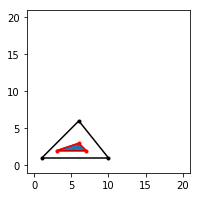

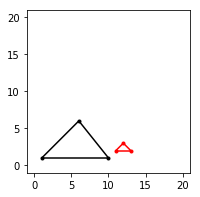

In [9]:
p1=[[1, 1], [6, 6], [10, 1]]
p2=[[3, 2], [6, 3], [7, 2]]
p3=[[11, 2], [12, 3], [13, 2]]

solutions.show_test(p1,p2)
solutions.show_test(p1,p3)

## Связка граней из $O(S_1,S_2)$ с гранями из $S_1$ и $S_2$

Для того, чтобы найти исходные грани для грани $f$ из $O(S_1,S_2)$, рассмотрим вершину $v$ грани $f$. 

Если $v$ — пересечение ребера $e_1$ из $S_1$ с ребром $e_2$ из $S_2$, тогда мы можем найти грани из $S_1$ и $S_2$, которые содержат грань $f$ очень просто. Для этого нам надо вызвать функцию $IncidentFace()$ в полуребрах, соответсвующие ребрам $e_1$ и $e_2$. 

Если $v$ — не пересечение, а вершина из $S_1$ (для $S_2$ аналогично), то мы легко можем найти грань из $S_1$, в которой содержится грань $f$. Для того, чтобы найти грань из $S_2$, содержащую $f$, нам надо проделать немного работы. Другими словами, нам надо знать для каждой вершины из $S_1$ в какой грани из $S_2$ она находится. Тогда мы сможем корректно пометить каждую грань из $O(S_1,S_2)$ гранями из $S_1$ и $S_2$. Чтобы решить эту задачу можно воспользоваться алгоритмом локализации в PSLG или алгоритмом заметающей прямой. 

В итоге, чтобы пометить каждую грань из $O(S_1,S_2)$ гранями из $S_1$ и $S_2$ надо:
* Связать каждую вершину из $S_1$ c гранями из $S_2$
* Связать каждую вершину из $S_2$ с гранями из $S_2$
* Рассмотреть любую вершину из каждой грани из $O(S_1,S_2)$. 

### Время работы
Для связки каждой вершины из $S_1$ c гранями из $S_2$ требуется $O(n\cdot\log n +k\cdot\log n)$ времени, аналогично надо связать каждую вершину из $S_2$  с гранями из $S_1$, что потребует $O(n\cdot\log n+k\cdot\log n)$ времени. Значит, чтобы пометить каждую грань из $O(S_1,S_2)$ гранями из $S_1$ и $S_2$ нам потребуется $O(n\cdot\log n+k\cdot\log n)$ времени. 


## Итог...

# Краткое описание алгоритма
На вход получаем два РСДС $S_1$ и $S_2$.
Возвращаем $O(S_1,S_2)$ в виде РСДС.
* Скопировать ребра $S_1$ в список ребер $S_2$ и получаем новый реберный список.
* Запустить алгоритм заметающей прямой, во время которого надо создать новые ребренные связи.
* В результате предыдущего шага, получаем $D$ - реберный список $O(S_1,S_2)$
* Найти все циклы в реберном списке $D$
* Для каждого цикла определить чем он является: границей дырки или границей грани.
* Для каждого цикла создать вершину графа $G$.
* Для каждого полуребра создать ссылку на вершину графа $G$, содержащую данное полуребро.
* Запустить алгоритм заметающей прямой и построить ребра граней $G$.
* Найти все компоненты связности графа $G$ и по ним построить грани и ссылки связанные с гранями.
* Пометить каждую грань из $O(S_1,S_2)$ гранями из $S_1$ и $S_2$.

# Время работы
Пусть $n_1$ - сложность $S_1$, а $n_2$ - сложность $S_2$. Пусть $n=n_1+n_2$. Тогда по доказанному ранее первая часть алгоритма работает за $O(n \cdot \log(n)+k \cdot \log(n))$. По доказанному ранее вторая часть алгоритма работает за $O(n+k)$. Значит весь алгоритм работает за $O(n \cdot \log(n)+k \cdot \log(n))$.

In [10]:
import solutions

## Упражнение 3

* Задача:
    * написать функцию, которая пересекает многоугольники
* Формат входных данных:
    * $points1$ $-$ массив с вершинами первого многоугольника.
    * $points2$ $-$ массив с вершинами второго многоугольника.
    * вершина задается следующим образом: $[x,y]$, где $x$ и $y$ $-$ координаты вершины
* Формат выходных данных:
    * массив точек многоугольника, образованного пересеченем заданных многоугольников
    * если пересечене пусто $-$ пустой массив
    

In [11]:
def overlaying(points1, points2):
    # Insert your code here...
    return []
overlaying = solutions.overlaying    

Проверим корректность решения:

* $solutions.test$_$overlaying$ тестирует функцию $overlaying$
* $solutions.show$_$test$ показывает, что должен выдавать написанный алгоритм на статических тестах, поданных на вход

In [12]:
solutions.test_overlaying(overlaying)

passed 2 tests
passed 4 tests
passed 6 tests
passed 8 tests
All tests passed


result=POLYGON ((5.775280898876405 2.910112359550562, 6 1, 2.923076923076923 1.769230769230769, 5.775280898876405 2.910112359550562))


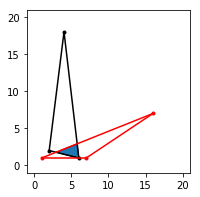

In [13]:
p1=[[2, 2], [4, 18], [6, 1]]
p2=[[1, 1], [16, 7], [7, 1]]

solutions.show_test(p1,p2)